In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv("/content/drive/MyDrive/smoking_driking_dataset_Ver01.csv")

# **About Dataset**

### **What is the size of data?**

In [3]:
df.shape

(991346, 24)

### **How does the data look like?**

In [4]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


### **What are the datatypes of columns?**

In [5]:
df.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

The columns Sex and DRK_YN are of object datatype , so we will have to convert it to numerical type.

### **Does the data contain missing values?**

In [6]:
print(df.isnull().sum())

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64


There are no missing values in the data.

### **What are the number of unique values in each column?**

In [7]:
df.nunique()

sex                    2
age                   14
height                13
weight                24
waistline            737
sight_left            24
sight_right           24
hear_left              2
hear_right             2
SBP                  171
DBP                  127
BLDS                 498
tot_chole            474
HDL_chole            223
LDL_chole            432
triglyceride        1657
hemoglobin           190
urine_protein          6
serum_creatinine     183
SGOT_AST             568
SGOT_ALT             594
gamma_GTP            940
SMK_stat_type_cd       3
DRK_YN                 2
dtype: int64

### **Are there any duplicates?**

In [8]:
df.duplicated().sum()

26

There are 26 duplicate rows  , so we will have to remove it.

### **How does the data look like mathematically?**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,991346.0,47.614491,14.181339,20.0,35.0,45.0,60.0,85.0
height,991346.0,162.240625,9.282957,130.0,155.0,160.0,170.0,190.0
weight,991346.0,63.284050,12.514241,25.0,55.0,60.0,70.0,140.0
waistline,991346.0,81.233358,11.850323,8.0,74.1,81.0,87.8,999.0
sight_left,991346.0,0.980834,0.605949,0.1,0.7,1.0,1.2,9.9
sight_right,991346.0,0.978429,0.604774,0.1,0.7,1.0,1.2,9.9
hear_left,991346.0,1.031495,0.174650,1.0,1.0,1.0,1.0,2.0
hear_right,991346.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
SBP,991346.0,122.432498,14.543148,67.0,112.0,120.0,131.0,273.0
DBP,991346.0,76.052627,9.889365,32.0,70.0,76.0,82.0,185.0


# **EDA**

## **Categorical Variable Analysis**

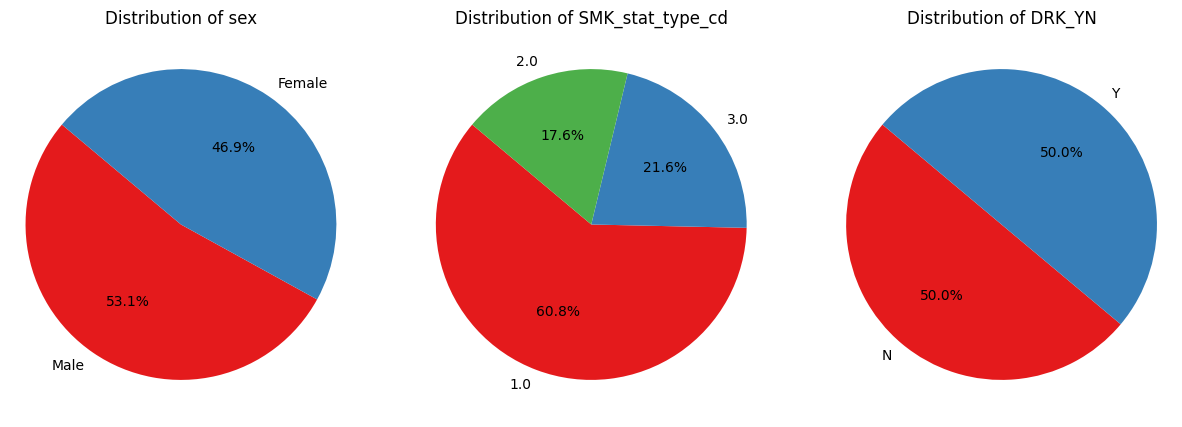

In [10]:
cols = ['sex','SMK_stat_type_cd', 'DRK_YN']

custom_palette = "Set1"
sns.set_palette(custom_palette)

fig, axes = plt.subplots(1, len(cols), figsize=(15, 5))

for i, column in enumerate(cols):
    category_counts = df[column].value_counts()
    axes[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].axis('equal')
    axes[i].set_title(f'Distribution of {column}')

plt.show()

### **Distribution of Drinking Status by Sex**

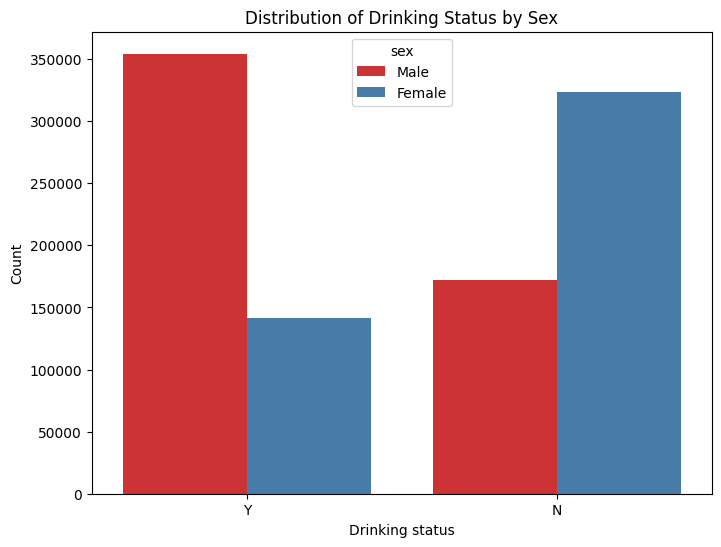

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='DRK_YN', hue='sex', palette='Set1')
plt.xlabel('Drinking status')
plt.ylabel('Count')
plt.title('Distribution of Drinking Status by Sex')
plt.show()

### **Distribution of Smoking Status by Sex**

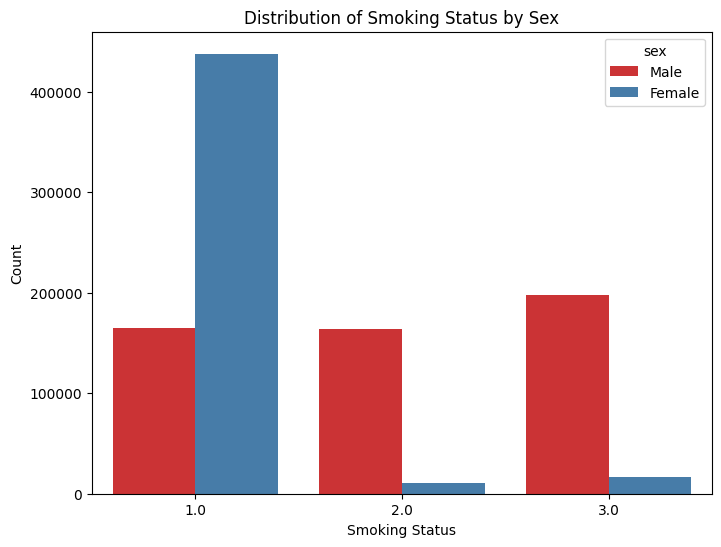

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SMK_stat_type_cd', hue='sex', palette='Set1')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Distribution of Smoking Status by Sex')
plt.show()

### **Smoking Status Distribution by Drinking status**

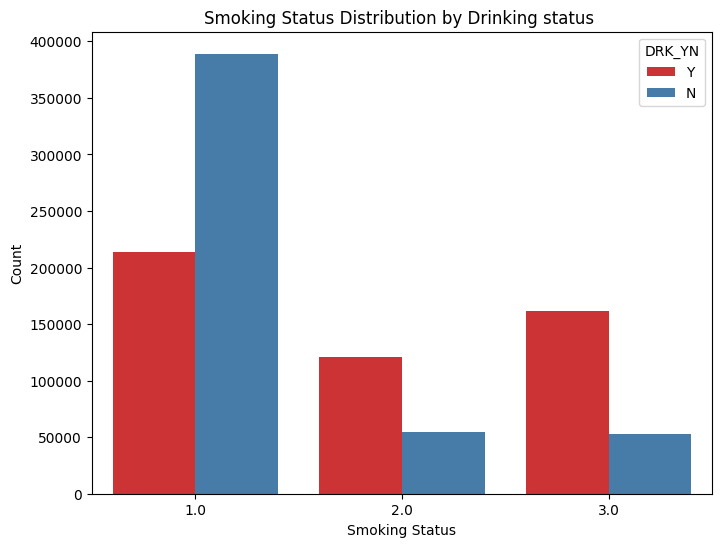

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SMK_stat_type_cd', hue='DRK_YN', palette='Set1')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Smoking Status Distribution by Drinking status ')
plt.show()

## **Analyzing Different Factors Across Smoking Groups**

### **Age Distribution by Smoking Status**

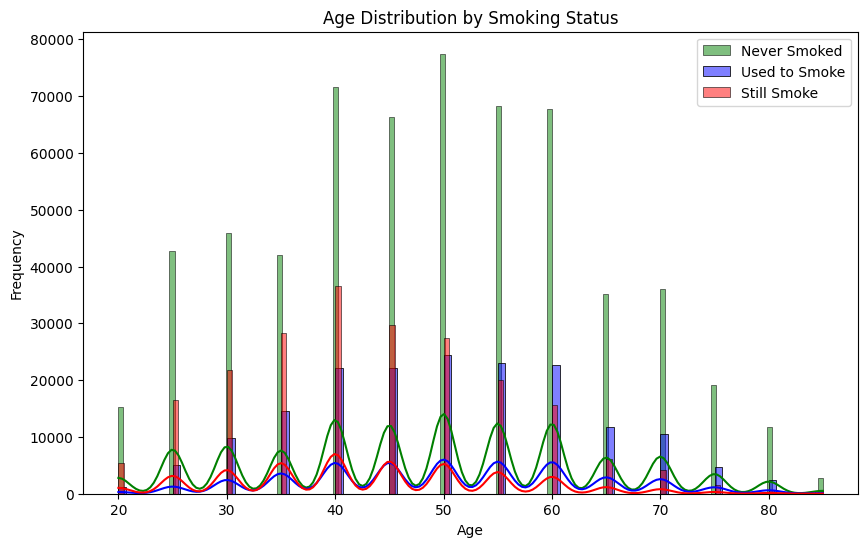

In [14]:
never_smoked = df[df['SMK_stat_type_cd'] == 1]
used_to_smoke = df[df['SMK_stat_type_cd'] == 2]
still_smoke = df[df['SMK_stat_type_cd'] == 3]

plt.figure(figsize=(10, 6))
sns.histplot(never_smoked['age'], color='green', label='Never Smoked', alpha=0.5, kde=True)
sns.histplot(used_to_smoke['age'], color='blue', label='Used to Smoke', alpha=0.5, kde=True)
sns.histplot(still_smoke['age'], color='red', label='Still Smoke', alpha=0.5, kde=True)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Smoking Status')
plt.legend()
plt.show()

### **Height Comparison by Smoking Status**

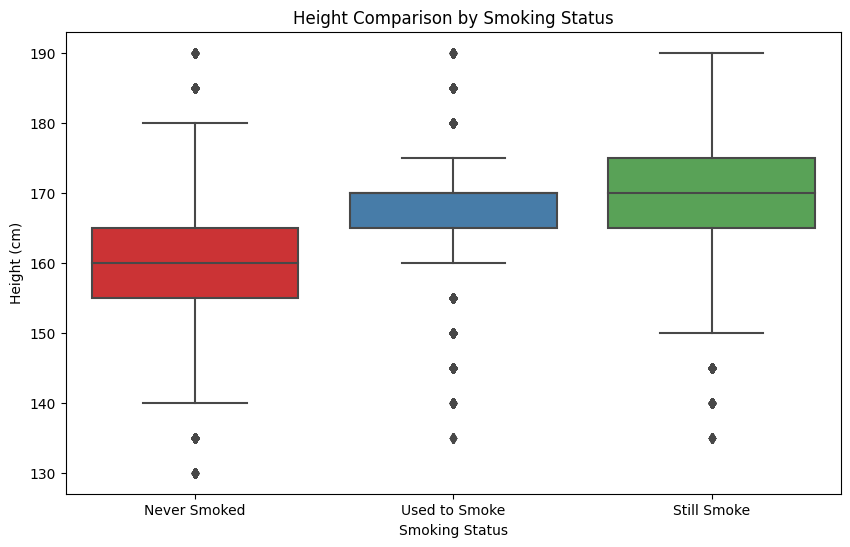

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SMK_stat_type_cd', y='height', data=df, palette='Set1')
plt.xlabel('Smoking Status')
plt.ylabel('Height (cm)')
plt.title('Height Comparison by Smoking Status')
plt.xticks(ticks=[0, 1, 2], labels=['Never Smoked', 'Used to Smoke', 'Still Smoke'])
plt.show()

### **Weight Distribution by Smoking Status**

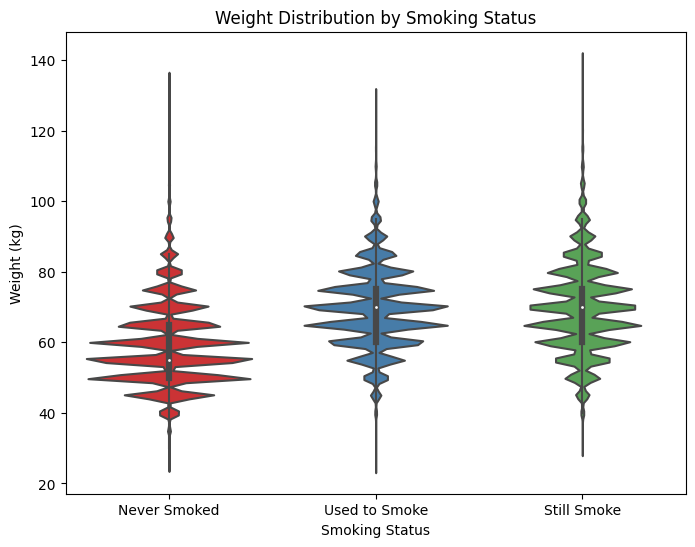

In [16]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='SMK_stat_type_cd', y='weight', palette='Set1')
plt.xlabel('Smoking Status')
plt.ylabel('Weight (kg)')
plt.title('Weight Distribution by Smoking Status')
plt.xticks(ticks=[0, 1, 2], labels=['Never Smoked', 'Used to Smoke', 'Still Smoke'])
plt.show()

### **SBP and DBP Distribution by Smoking Status**

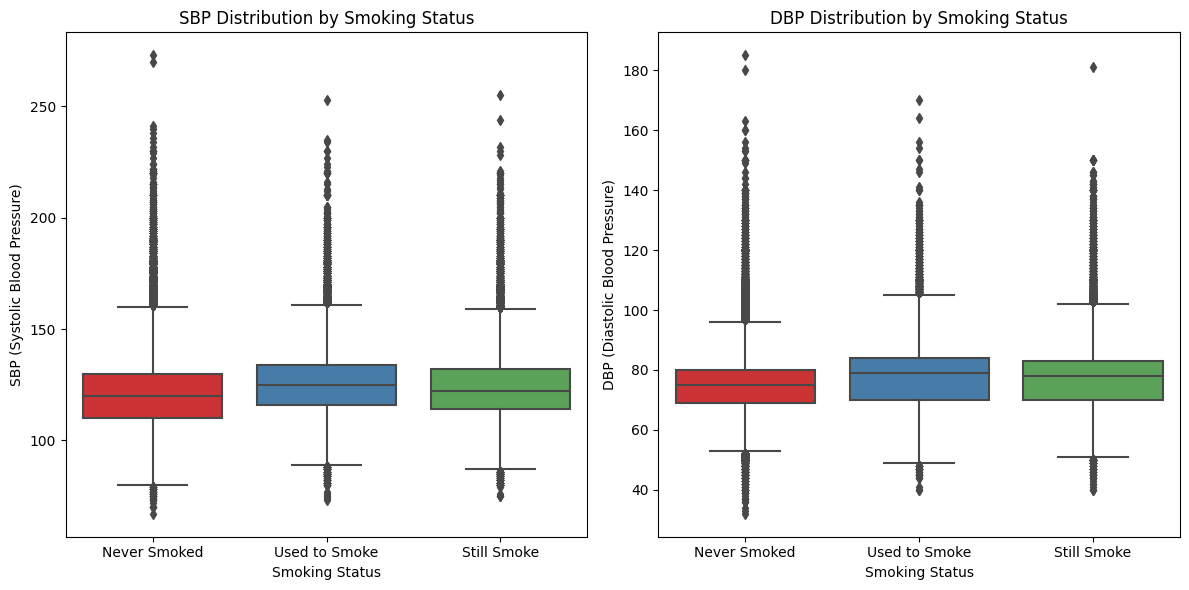

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='SMK_stat_type_cd', y='SBP', palette='Set1')
plt.xlabel('Smoking Status')
plt.ylabel('SBP (Systolic Blood Pressure)')
plt.title('SBP Distribution by Smoking Status')
plt.xticks(ticks=[0, 1, 2], labels=['Never Smoked', 'Used to Smoke', 'Still Smoke'])

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='SMK_stat_type_cd', y='DBP', palette='Set1')
plt.xlabel('Smoking Status')
plt.ylabel('DBP (Diastolic Blood Pressure)')
plt.title('DBP Distribution by Smoking Status')
plt.xticks(ticks=[0, 1, 2], labels=['Never Smoked', 'Used to Smoke', 'Still Smoke'])

plt.tight_layout()
plt.show()

### **Hemoglobin Level Distribution by Smoking Status**

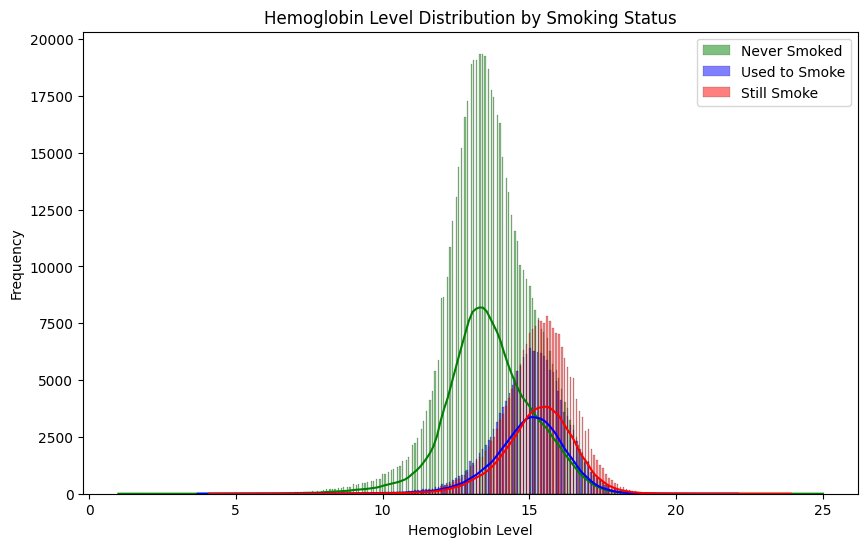

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(never_smoked['hemoglobin'], color='green', label='Never Smoked', kde=True)
sns.histplot(used_to_smoke['hemoglobin'], color='blue', label='Used to Smoke', kde=True)
sns.histplot(still_smoke['hemoglobin'], color='red', label='Still Smoke', kde=True)

plt.xlabel('Hemoglobin Level')
plt.ylabel('Frequency')
plt.title('Hemoglobin Level Distribution by Smoking Status')
plt.legend()
plt.show()

### **Cholesterol levels (specifically HDL_chole) for different smoking status groups**

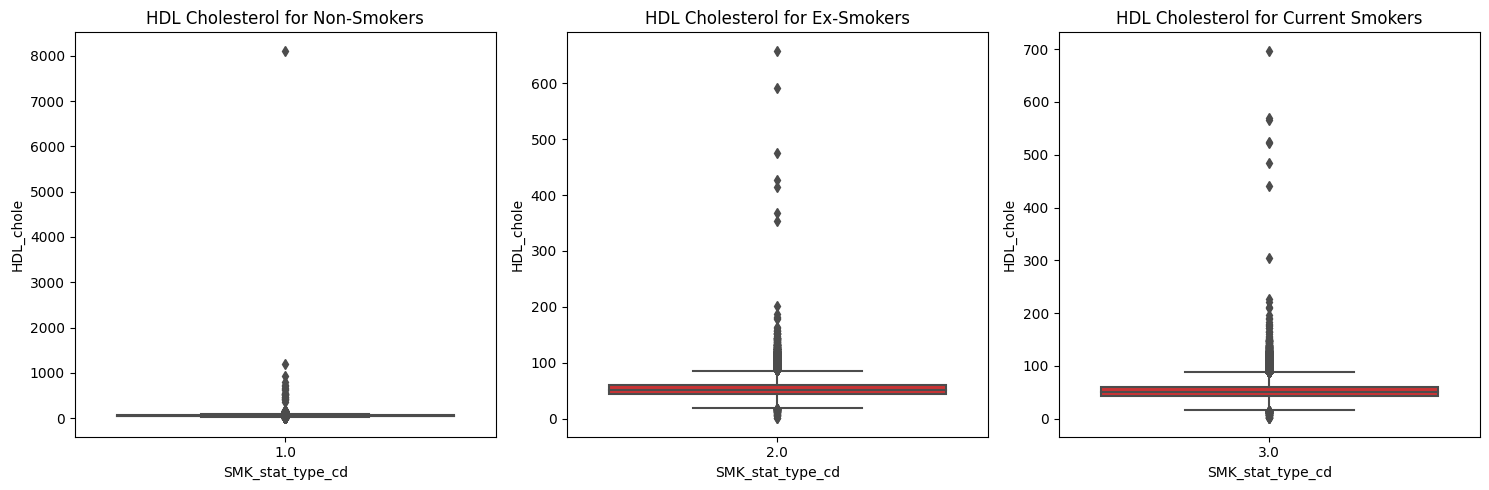

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=never_smoked, x='SMK_stat_type_cd', y='HDL_chole', palette='Set1', ax=axes[0])
axes[0].set_title('HDL Cholesterol for Non-Smokers')

sns.boxplot(data=used_to_smoke, x='SMK_stat_type_cd', y='HDL_chole', palette='Set1', ax=axes[1])
axes[1].set_title('HDL Cholesterol for Ex-Smokers')

sns.boxplot(data=still_smoke, x='SMK_stat_type_cd', y='HDL_chole', palette='Set1', ax=axes[2])
axes[2].set_title('HDL Cholesterol for Current Smokers')

plt.tight_layout()
plt.show()

### **Cholesterol levels (specifically LDL_chole) for different smoking status groups**

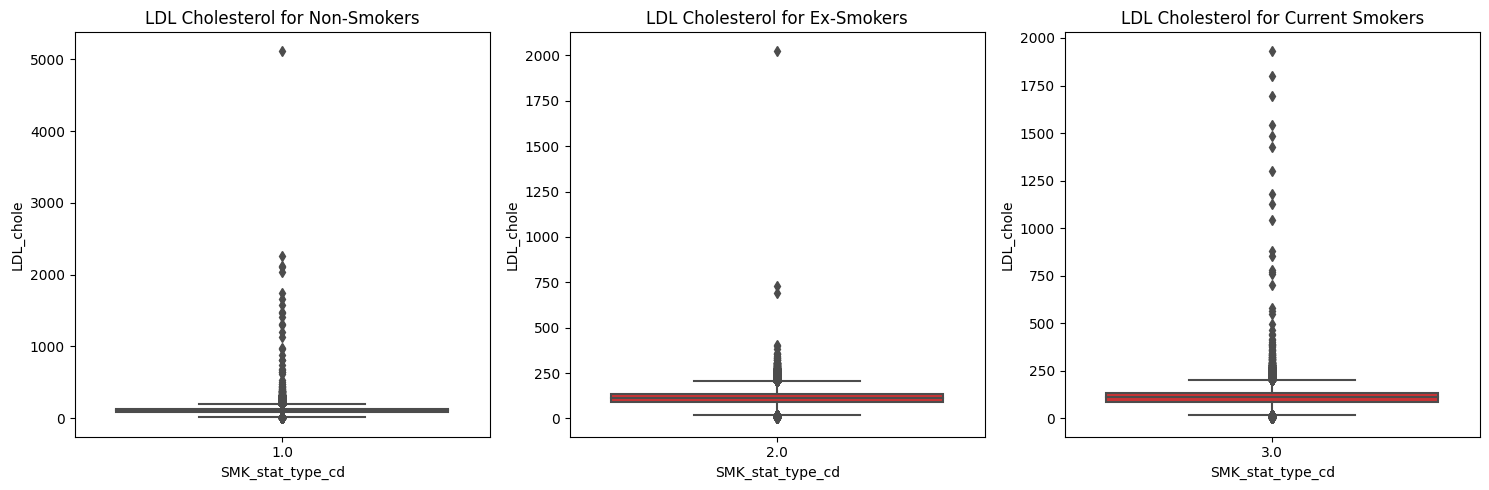

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=never_smoked, x='SMK_stat_type_cd', y='LDL_chole', palette='Set1', ax=axes[0])
axes[0].set_title('LDL Cholesterol for Non-Smokers')

sns.boxplot(data=used_to_smoke, x='SMK_stat_type_cd', y='LDL_chole', palette='Set1', ax=axes[1])
axes[1].set_title('LDL Cholesterol for Ex-Smokers')

sns.boxplot(data=still_smoke, x='SMK_stat_type_cd', y='LDL_chole', palette='Set1', ax=axes[2])
axes[2].set_title('LDL Cholesterol for Current Smokers')

plt.tight_layout()
plt.show()

# **Classification problems**

### **TASK 1**

Predicting Smoking Status (SMK_stat_type_cd ):




*  In this classification problem , we can predict a person's
smoking status . The target variable represents the smoking state (1(never), 2(used to smoke but quit), 3(still smoke))

### **TASK 2**

Predicting Drinking Status (DRK_YN):

*   In this classification problem , we can predict a person's drinking status. The target variable, DRK_YN, represents whether an individual is a drinker ("Y") or a non-drinker ("N").

# **Preprocessing**

### **Encoding Variables**

In [21]:
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['DRK_YN'] = label_encoder.fit_transform(df['DRK_YN'])

### **Dropping Duplicates**

In [22]:
df = df.drop_duplicates()
print(df.shape)

(991320, 24)


# **TASK 1 Implementation**

In [23]:
X = df.drop(columns=['SMK_stat_type_cd'])
y = df['SMK_stat_type_cd']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Decision Tree Classifier**

In [26]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
dt_y_pred = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_report = classification_report(y_test, dt_y_pred)

print("Decision Tree Classifier:")
print("Classification Report:")
print(dt_report)

Decision Tree Classifier:
Classification Report:
              precision    recall  f1-score   support

         1.0       0.79      0.78      0.78    120527
         2.0       0.33      0.34      0.34     35087
         3.0       0.41      0.42      0.42     42650

    accuracy                           0.62    198264
   macro avg       0.51      0.51      0.51    198264
weighted avg       0.63      0.62      0.63    198264



### **Logistic Regression Classifier**

In [27]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Logistic Regression Classifier:")
print("Classification Report:")
print(report)

Logistic Regression Classifier:
Classification Report:
              precision    recall  f1-score   support

         1.0       0.82      0.84      0.83    120527
         2.0       0.46      0.32      0.38     35087
         3.0       0.50      0.59      0.54     42650

    accuracy                           0.69    198264
   macro avg       0.59      0.58      0.58    198264
weighted avg       0.69      0.69      0.69    198264



# **TASK 2 Implementation**

In [28]:
X = df.drop(columns=['DRK_YN'])
y = df['DRK_YN']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Decision Tree Classifier**

In [31]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
dt_y_pred = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_report = classification_report(y_test, dt_y_pred)

print("Decision Tree Classifier:")
print("Classification Report:")
print(dt_report)

Decision Tree Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.64      0.65     99512
           1       0.64      0.65      0.65     98752

    accuracy                           0.65    198264
   macro avg       0.65      0.65      0.65    198264
weighted avg       0.65      0.65      0.65    198264



### **Logistic Regression Classifier**

In [32]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Logistic Regression Classifier:")
print("Classification Report:")
print(report)

Logistic Regression Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73     99512
           1       0.73      0.72      0.72     98752

    accuracy                           0.73    198264
   macro avg       0.73      0.73      0.73    198264
weighted avg       0.73      0.73      0.73    198264

